In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_path = "C:/Users/New/data/train/"
test_path = "C:/Users/New/data/valid/"

In [4]:
BATCH_SIZE = 10

train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True

).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana','rottenoranges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)

Found 10901 images belonging to 6 classes.


In [5]:
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana','rottenoranges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)


Found 2698 images belonging to 6 classes.


In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64,(3,3), activation=('relu')))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation=('relu')))
model.add(Dense(128, activation=('relu')))

model.add(Dense(6, activation=('softmax')))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(test_batches, epochs=17)

Epoch 1/17
270/270 [==============================] - 15s 53ms/step - loss: 1.4400 - accuracy: 0.4155
Epoch 2/17
270/270 [==============================] - 11s 40ms/step - loss: 0.9043 - accuracy: 0.6368
Epoch 3/17
270/270 [==============================] - 11s 41ms/step - loss: 0.6543 - accuracy: 0.7465
Epoch 4/17
270/270 [==============================] - 11s 42ms/step - loss: 0.5354 - accuracy: 0.7902
Epoch 5/17
270/270 [==============================] - 11s 42ms/step - loss: 0.4206 - accuracy: 0.8480
Epoch 6/17
270/270 [==============================] - 11s 41ms/step - loss: 0.3657 - accuracy: 0.8681
Epoch 7/17
270/270 [==============================] - 11s 39ms/step - loss: 0.3080 - accuracy: 0.8907
Epoch 8/17
270/270 [==============================] - 11s 39ms/step - loss: 0.2884 - accuracy: 0.8958
Epoch 9/17
270/270 [==============================] - 11s 39ms/step - loss: 0.2289 - accuracy: 0.9181
Epoch 10/17
270/270 [==============================] - 12s 46ms/step - loss: 0.220

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

classes=['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana','rottenoranges']


def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(20, 20))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,20,20,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

rottenapples


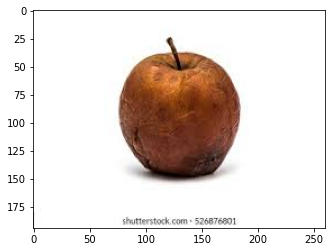

In [9]:
prediction= make_predictions('C:/Users/New/pic.jpg')
MaxPosition=np.argmax(prediction)  
prediction_label=classes[MaxPosition]
print(prediction_label) 